In [1]:
%load_ext autoreload
%autoreload 2

import os
import os.path as osp
import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb

sys.path.append("../src")

from plot_utils import process_results, execute_df_rollout,execute_plot, find_max_train_save

api = wandb.Api(
    overrides={"entity": "kobybibas", "project": "pnml_for_active_learning"}
)
out_dir = "../outputs/analysis"
os.makedirs(out_dir, exist_ok=True)

# Project is specified by
runs = api.runs("kobybibas/pnml_for_active_learning")


In [2]:
! wandb login

wandb: Currently logged in as: kobybibas. Use `wandb login --relogin` to force relogin


In [6]:
random_runs = [
    'kobybibas/pnml_for_active_learning/2fafuyfd',
    'kobybibas/pnml_for_active_learning/2omu5s0f',
    'kobybibas/pnml_for_active_learning/2ouexbd0',
    'kobybibas/pnml_for_active_learning/1pik2x1e',
    'kobybibas/pnml_for_active_learning/lamt1no9',
    'kobybibas/pnml_for_active_learning/1mrnydlf'
]
bald_runs = [
    'kobybibas/pnml_for_active_learning/3dowhzcw',
    'kobybibas/pnml_for_active_learning/3q4i00ny',
    'kobybibas/pnml_for_active_learning/2tghe9mz',
    'kobybibas/pnml_for_active_learning/1brixcy5',
    'kobybibas/pnml_for_active_learning/35xkjwu0',
    'kobybibas/pnml_for_active_learning/3brs09kl'
]
pnml_runs = [ # sweep 2.0
    'kobybibas/pnml_for_active_learning/2pilk2ab',
    'kobybibas/pnml_for_active_learning/2dd1e774',
    'kobybibas/pnml_for_active_learning/3pq4serc',
    'kobybibas/pnml_for_active_learning/3vcldr6s',
    'kobybibas/pnml_for_active_learning/37ib96kq',
    'kobybibas/pnml_for_active_learning/29aojyws'
]

random_dfs = process_results(api=api,run_list=random_runs)
bald_dfs = process_results(api=api,run_list=bald_runs)
pnml_dfs = process_results(api=api,run_list=pnml_runs)

kobybibas/pnml_for_active_learning/2fafuyfd
kobybibas/pnml_for_active_learning/2omu5s0f
kobybibas/pnml_for_active_learning/2ouexbd0
kobybibas/pnml_for_active_learning/1pik2x1e
kobybibas/pnml_for_active_learning/lamt1no9
kobybibas/pnml_for_active_learning/1mrnydlf
kobybibas/pnml_for_active_learning/3dowhzcw
kobybibas/pnml_for_active_learning/3q4i00ny
kobybibas/pnml_for_active_learning/2tghe9mz
kobybibas/pnml_for_active_learning/1brixcy5
kobybibas/pnml_for_active_learning/35xkjwu0
kobybibas/pnml_for_active_learning/3brs09kl
kobybibas/pnml_for_active_learning/2pilk2ab


In [4]:
rolling_size = 5
random_res = execute_df_rollout(random_dfs,rolling_size=rolling_size)
bald_res = execute_df_rollout(bald_dfs,rolling_size=rolling_size)
pnml_res = execute_df_rollout(pnml_dfs,rolling_size=rolling_size)
plot_list = [(random_res, "Random"), (bald_res, "Bald"),(pnml_res, "pNML")]

In [ ]:
row = find_max_train_save(pnml_res, bald_res)
print(100*row.training_set_size_left/row.training_set_size_right)
print(row)

EMNIST OOD


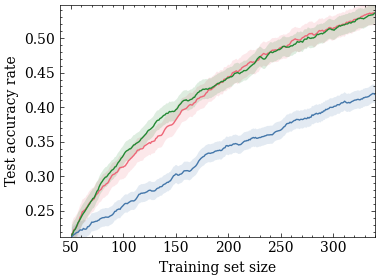

In [5]:
plt.style.use(["science", "bright",'no-latex'])
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(4, 3))
fig,ax = execute_plot(plot_list,fig,ax)
print("EMNIST OOD")
ax.get_legend().remove()
ax.set_xlim(40,340)
plt.tight_layout()
plt.savefig(osp.join(out_dir, "emnist_ood.pdf"))
plt.show()